In [ ]:
pip install "litellm==1.72.6" "tokenizers>=0.20.3" "chromadb==0.5.23"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
pip check

ipython 7.34.0 requires jedi, which is not installed.
torch 2.6.0+cu124 has requirement nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2.
torch 2.6.0+cu124 has requirement nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82.
torch 2.6.0+cu124 has requirement nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82.
torch 2.6.0+cu124 has requirement nvidia-cuda-runtime-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-runtime-cu12 12.5.82.
torch 2.6.0+cu124 has requirement nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75.
torch 2.6.0+cu124 has requirement nvidia-cufft-cu12==11.2.1.3; platform_system == "Linux

In [ ]:
pip install transformers -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.5.23 requires tokenizers<=0.20.3,>=0.13.2, but you have tokenizers 0.21.2 which is incompatible.


In [ ]:
# Import required libraries for model, tokenizer, and visualization
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Setup the model and tokenizer
model_name = 'bert-base-uncased'  # Specify pre-trained model name
tokenizer = BertTokenizer.from_pretrained(model_name)  # Load tokenizer for model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Load BERT model for sequence classification with 2 labels


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize input text
travel_query = "What are the best family-friendly travel destinations in Europe?"  # Example travel-related query
inputs = tokenizer(travel_query, return_tensors="pt", truncation=True, padding=True)  # Tokenize input query with padding and truncation
input_ids = inputs['input_ids']  # Extract token IDs for the input text

In [ ]:
# Function to get attention scores from the model
def get_attention_scores(model, inputs):
    # Run model with input and extract attention scores
    outputs = model(**inputs, output_attentions=True)
    return outputs.attentions  # Return attention scores from all layers


In [ ]:
# Function to visualize attention scores
def visualize_attention(attention_scores, tokens):
    sns.set(style='whitegrid')  # Set seaborn style for heatmap
    fig, ax = plt.subplots(figsize=(8, 8))  # Create a figure for plotting
    attention_layer = attention_scores[-1][0]  # Extract the last attention layer's scores
    attention_weights = attention_layer[0].detach().numpy()  # Convert attention scores to numpy array for plotting

    # Plot the attention heatmap
    sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap="viridis", ax=ax)
    plt.title("Attention Visualization")  # Title for the plot
    plt.show()  # Display the plot

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


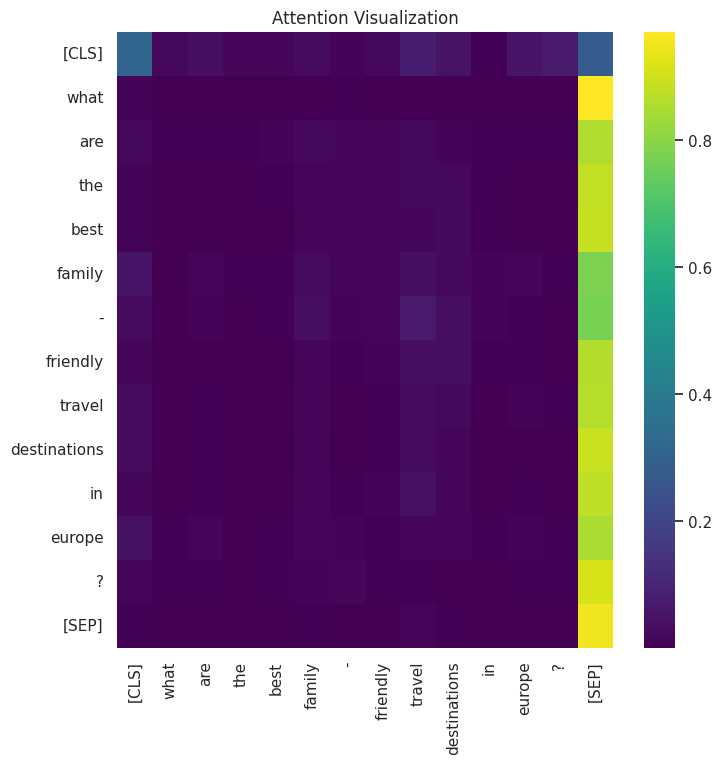

In [ ]:
# Get attention scores from the model
attention_scores = get_attention_scores(model, inputs)

# Decode the input IDs to get human-readable tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Visualize the attention scores for the tokens in the input
visualize_attention(attention_scores, tokens)


In [ ]:
pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 914.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 771.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:

# Import necessary library for saliency map visualization
from captum.attr import Saliency


# Saliency Map Visualization function to visualize the importance of each token
def visualize_saliency(sentence):
    # Step 1: Tokenize the input sentence
    # Use the BERT tokenizer to convert the input sentence into token IDs and attention masks.
    # Attention mask ensures the padding tokens are ignored during processing.
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Step 2: Ensure the model is in evaluation mode
    # In evaluation mode, the model will not perform backpropagation (no parameter updates),
    # which is important for inference and visualizations.
    model.eval()

    # Step 3: Get embeddings and enable gradient tracking
    # Get the token embeddings from the model's input embedding layer and enable gradient tracking.
    # This allows the saliency map to be computed based on the gradients of the embeddings.
    embeddings = model.get_input_embeddings()(input_ids).requires_grad_()

    # Step 4: Define a custom forward function for the model
    # The forward function will process the embeddings directly and return the model's logits (predictions).
    # We bypass the usual model inputs to directly feed the embeddings for saliency calculation.
    def forward_with_logits(embeddings):
        return model(inputs_embeds=embeddings, attention_mask=attention_mask).logits

    # Step 5: Initialize Saliency and compute the saliency scores
    # Saliency scores measure the contribution of each token to the model's prediction.
    saliency = Saliency(forward_with_logits)

    # Get the saliency scores for the input embeddings with respect to the positive class (target=1)
    saliency_scores = saliency.attribute(embeddings, target=1)

    # Step 6: Convert token IDs back to human-readable tokens
    # This step helps us map the token IDs back into actual words for better interpretability.
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    # Step 7: Aggregate the saliency scores for visualization
    # Summing the saliency scores across the token's embedding dimension to get a single score for each token.
    # This helps in visualizing the importance of each token in a 2D plot.
    saliency_scores = saliency_scores.sum(dim=2).squeeze()

    # Step 8: Visualize the saliency map
    # Create a bar chart where each token's importance score is plotted, allowing us to see which tokens
    # are most important for the model's decision. Tokens on the x-axis and saliency scores on the y-axis.
    plt.bar(range(len(tokens)), saliency_scores.detach().numpy(), tick_label=tokens, color='teal')

    # Rotate x-axis labels for better readability of tokens
    plt.xticks(rotation=45)

    # Add a title to the plot
    plt.title("Saliency Map")

    # Display the plot
    plt.show

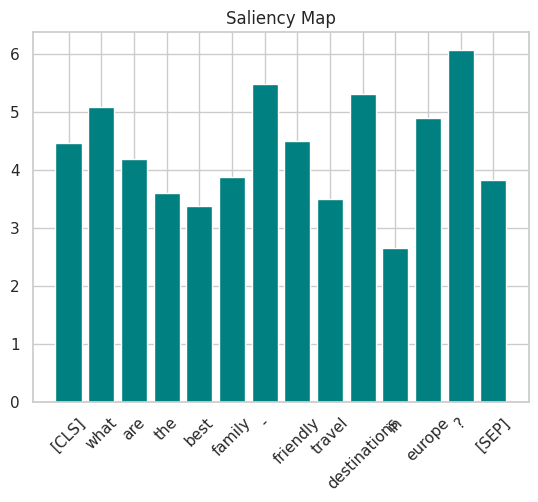

In [ ]:
# Example input sentence
travel_query = "What are the best family-friendly travel destinations in Europe?"

# Example sentence to visualize saliency for
visualize_saliency(travel_query)

In [ ]:
import getpass
import os
from openai import OpenAI  # Still using openai SDK, just changing the base_url

# Prompt the user to enter the Groq API key securely
groq_api_key = getpass.getpass(prompt="Enter your Groq API Key: ")
os.environ["GROQ_API_KEY"] = groq_api_key

# Function to generate an explanation using Groq
def generate_explanation_with_groq(text):
    # Initialize the OpenAI-compatible client for Groq
    client = OpenAI(
        base_url="https://api.groq.com/openai/v1",  # Groq base URL
        api_key=os.environ["GROQ_API_KEY"]
    )

    # Make a chat completion request to Groq
    response = client.chat.completions.create(
        model="llama3-70b-8192",  # Groq-supported model (you can also try mixtral-8x7b-32768)
        messages=[
            {"role": "system", "content": "You are an explainability assistant."},
            {"role": "user", "content": f"Explain why '{text}' is important in the context of travel."}
        ]
    )

    # Extract the generated explanation
    explanation = response.choices[0].message.content

    return explanation

# Example usage
travel_query = "sustainable tourism"
explanation = generate_explanation_with_groq(travel_query)

# Output the result
print(f"Explanation:\n{explanation}")

Enter your Groq API Key: ··········
Explanation:
Sustainable tourism is crucial in the context of travel because it acknowledges the potential negative impacts of tourism on local environments, economies, and societies, and seeks to mitigate them. Here are some reasons why sustainable tourism is important:

1. **Conservation of Natural Resources**: Tourism can put pressure on natural resources such as water, energy, and land, leading to their depletion. Sustainable tourism practices, like reducing waste and carbon emissions, help conserve these resources for future generations.
2. **Protection of Cultural Heritage**: Sustainable tourism promotes the preservation of cultural heritage sites, monuments, and traditional practices. This helps maintain the authenticity and diversity of local cultures, preventing their erosion or exploitation.
3. **Supports Local Economies**: Sustainable tourism ensures that the economic benefits of tourism stay within the local community. This is achieved by